# A Simple Movie Recommendation System Logic

### Tasks

- Load the dataset
- Clean the dataset and remove missing values
- Change genre strings into vectors using TF-IDF Vectorizer
- Compare movies using genre codes
- Create recommendation function and show it through chart

### First, we import all necessary libraries and then work with the dataset

In [1]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt

In [2]:
# Load the dataset

netflix_data = pd.read_csv('netflix_titles.csv')

# Display the first few rows to get the gist of the dataset

netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# Drop rows with missing values in 'listed_in' (genres) and 'title'

netflix_data = netflix_data.dropna(subset=['listed_in', 'title'])

# Combine 'listed_in' (genres) into a single string for each movie

netflix_data['genre_str'] = netflix_data['listed_in'].str.replace(',', '').str.split().str.join(' ')

# Display the processed data

netflix_data[['title', 'genre_str']].head()

,title,genre_str
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows TV Dramas TV Mysteries
2,Ganglands,Crime TV Shows International TV Shows TV Actio...
3,Jailbirds New Orleans,Docuseries Reality TV
4,Kota Factory,International TV Shows Romantic TV Shows TV Co...


### Here we use titles and their genres for this recommendation logic

In [4]:
# Create a TF-IDF Vectorizer to convert genre strings to vectors
# It helps in transforming text into numerical values that can be used and processed by ML algorithms.

tfidf = TfidfVectorizer(stop_words='english')  # The stop words is used to ignore certain words like 'the' or 'and' 

# Fit and transform the data

tfidf_matrix = tfidf.fit_transform(netflix_data['genre_str'])

# Display the shape of the matrix

tfidf_matrix.shape

(8807, 44)

### Finding Similar Movies using Cosine Similarity

- This checks the genre codes for each title and sees how close they are to each other

In [5]:
# Calculate the cosine similarity matrix

cosine_s = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Display the similarity matrix

cosine_s.shape

(8807, 8807)

### Recommending Movies and Visualizing them

In [6]:
# Creates a pandas Series where the index is the movie titles (netflix_data['title']) and the values are the indices of the DataFrame (netflix_data.index).

indices = pd.Series(netflix_data.index, index=netflix_data['title']).drop_duplicates() # Ensures that there are no duplicates

# Now time to create function that recommends movies using cosine similarity scores.

def recommend_movies(title, cosine_s=cosine_s):
    
    
    # Get the index of the movie that matches the title
    
    idx = indices[title]
    
    
     # Get the similarity scores and sort them
        
    sim_scores = cosine_s[idx]
    
    
    # Sort indices by similarity scores in descending order
    
    sorted_indices = sim_scores.argsort()[::-1]  
    
    
    # Get the top 10 most similar movies (excluding the first one, which is the movie itself)
    
    top_8_indices = sorted_indices[1:9]
    
    
    # Return the titles of the top 8 most similar movies
    
    return netflix_data['title'].iloc[top_8_indices]


# Test the recommendation system with a sample movie

recommendations = recommend_movies('Ganglands')

recommendations

6102        Agent Raghav
5194           The Truth
543           Undercover
7157               Kaçak
2676               Fauda
11      Bangkok Breaking
4662        Monkey Twins
3414              Chosen
Name: title, dtype: object

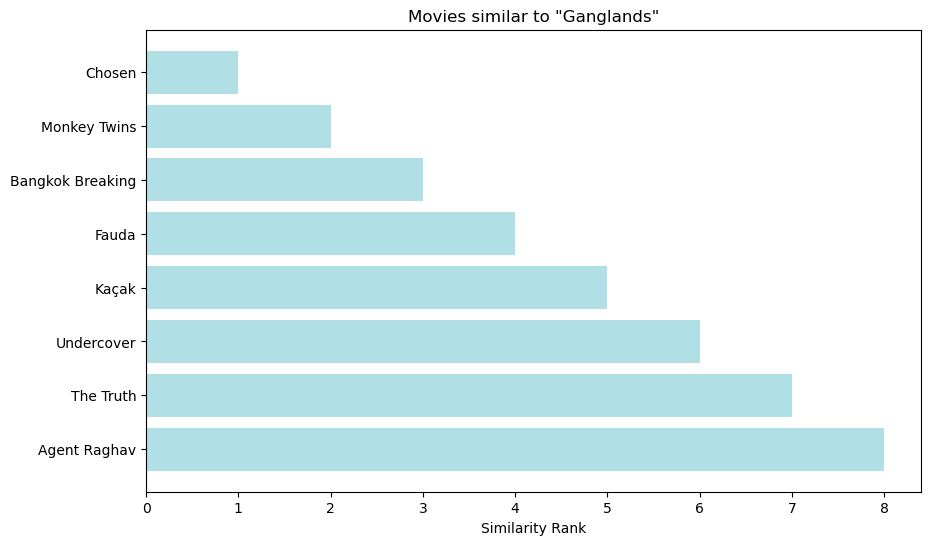

In [7]:
def visualize_recom(title, recommendations):
    
    
    # Convert recommendations to a list for easier plotting
    
    recommendations = list(recommendations)
    
    
    # Plot the recommendations
    
    plt.figure(figsize=(10, 6))
    plt.barh(recommendations[::-1], range(1, len(recommendations) + 1), color='powderblue')
    plt.xlabel('Similarity Rank')
    plt.title(f'Movies similar to "{title}"')
    plt.gca().invert_yaxis()  # Invert the y-axis to have the highest ranked movie at the top
    plt.show()

    
# Visualize recommendations for a sample movie

recommendations = recommend_movies('Ganglands')

visualize_recom('Ganglands', recommendations)

### Another Example

In [8]:
recommendations = recommend_movies('Dick Johnson Is Dead')

recommendations

4555             The Meaning of Monty Python
8278                       The Devil We Know
1466            The Minimalists: Less Is Now
4543           Monty Python Conquers America
462                  This Changes Everything
4548       Monty Python: The Meaning of Live
7092    Invisible Essence: The Little Prince
1911                            Human Nature
Name: title, dtype: object

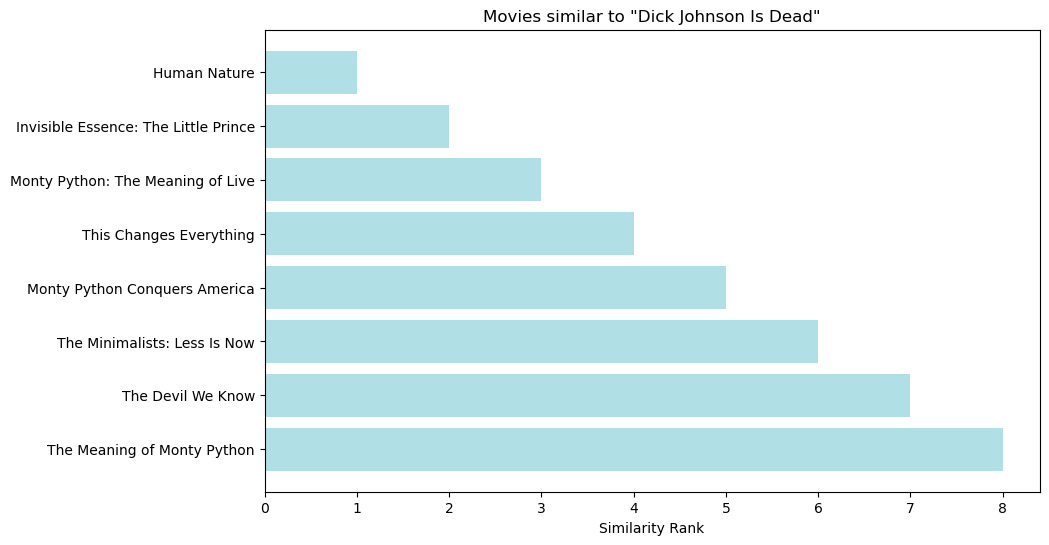

In [10]:
# Visualize recommendations for another sample movie

recommendations = recommend_movies('Dick Johnson Is Dead')

visualize_recom('Dick Johnson Is Dead', recommendations)